<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

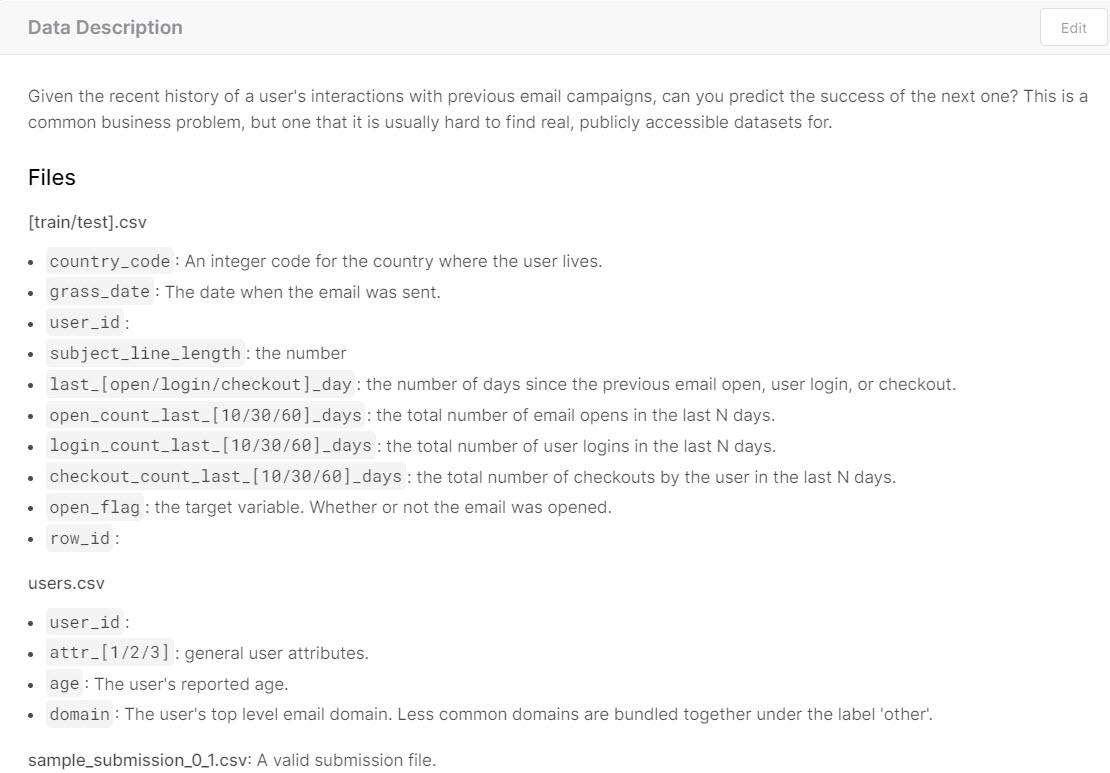

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

# PCA  & LDA Analysis

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## Define Functions

In [2]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

## Reading in the dataset

Reading User data

In [3]:
#Read the csv file 
dataset7_df = pd.read_csv('data/dataset7.csv')

In [4]:
dataset7_df

,attr_3,age,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,0,31,35,85,9,2000,0,0,0,17,...,0,0,1,0,0,0,0,0,1,0
1,2,33,64,59,1,3,0,0,1,27,...,0,0,0,1,0,0,0,0,0,0
2,1,36,50,40,9,253,0,0,3,2,...,0,0,0,0,0,0,0,0,1,0
3,1,43,35,2,1,2,1,3,3,31,...,1,0,0,0,0,0,0,1,0,0
4,0,31,40,29,3,6,0,1,2,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124161,0,31,49,2,21,2000,1,4,4,0,...,0,0,0,1,0,0,0,0,0,0
124162,0,31,41,22,3,27,0,2,4,0,...,0,0,0,0,1,0,0,0,0,0
124163,0,31,38,20,5,2000,0,3,7,0,...,0,0,0,0,0,1,0,0,0,0
124164,0,31,47,1000,7,2000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
dataset7_df.shape

(124166, 30)

In [6]:
dataset7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124166 entries, 0 to 124165
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   attr_3                       124166 non-null  int64
 1   age                          124166 non-null  int64
 2   subject_line_length          124166 non-null  int64
 3   last_open_day                124166 non-null  int64
 4   last_login_day               124166 non-null  int64
 5   last_checkout_day            124166 non-null  int64
 6   open_count_last_10_days      124166 non-null  int64
 7   open_count_last_30_days      124166 non-null  int64
 8   open_count_last_60_days      124166 non-null  int64
 9   login_count_last_10_days     124166 non-null  int64
 10  login_count_last_30_days     124166 non-null  int64
 11  login_count_last_60_days     124166 non-null  int64
 12  checkout_count_last_10_days  124166 non-null  int64
 13  checkout_count_last_30_days  

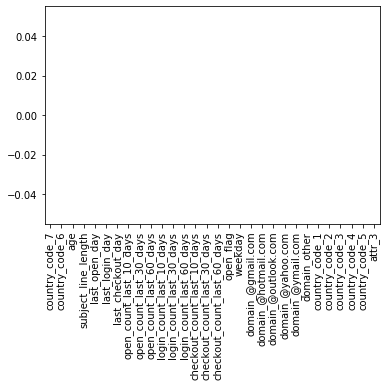

In [7]:
dataset7_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

### Train-test split dataset

reading trainng data

In [8]:
X = dataset7_df.drop(['open_flag'], axis=1)
y = dataset7_df['open_flag']

In [9]:
X.shape

(124166, 29)

In [10]:
y.shape

(124166,)

In [11]:
features = list(X)
features

['attr_3',
 'age',
 'subject_line_length',
 'last_open_day',
 'last_login_day',
 'last_checkout_day',
 'open_count_last_10_days',
 'open_count_last_30_days',
 'open_count_last_60_days',
 'login_count_last_10_days',
 'login_count_last_30_days',
 'login_count_last_60_days',
 'checkout_count_last_10_days',
 'checkout_count_last_30_days',
 'checkout_count_last_60_days',
 'weekday',
 'domain_@gmail.com',
 'domain_@hotmail.com',
 'domain_@outlook.com',
 'domain_@yahoo.com',
 'domain_@ymail.com',
 'domain_other',
 'country_code_1',
 'country_code_2',
 'country_code_3',
 'country_code_4',
 'country_code_5',
 'country_code_6',
 'country_code_7']

In [12]:
len(features)

29

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [14]:
X_train.shape

(100574, 29)

In [15]:
X_train.columns

Index(['attr_3', 'age', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'weekday',
       'domain_@gmail.com', 'domain_@hotmail.com', 'domain_@outlook.com',
       'domain_@yahoo.com', 'domain_@ymail.com', 'domain_other',
       'country_code_1', 'country_code_2', 'country_code_3', 'country_code_4',
       'country_code_5', 'country_code_6', 'country_code_7'],
      dtype='object')

In [16]:
X_val.shape

(11175, 29)

In [17]:
X_test.shape

(12417, 29)

#### Check for Co-relation

In [18]:
# correlation matrix (before stdze)
corr = X_train.corr()
print('Corelation Matrix:\n',X_train.corr())

Corelation Matrix:
                                attr_3       age  subject_line_length  \
attr_3                       1.000000  0.044895             0.005171   
age                          0.044895  1.000000            -0.046592   
subject_line_length          0.005171 -0.046592             1.000000   
last_open_day               -0.044867 -0.051847             0.060740   
last_login_day              -0.148818 -0.015145             0.054661   
last_checkout_day           -0.339664 -0.035024             0.037856   
open_count_last_10_days      0.000237  0.059981            -0.016528   
open_count_last_30_days     -0.000208  0.073148            -0.030555   
open_count_last_60_days      0.006539  0.075182            -0.035778   
login_count_last_10_days     0.221952  0.057180            -0.004757   
login_count_last_30_days     0.234190  0.063087            -0.007525   
login_count_last_60_days     0.244951  0.065026            -0.010219   
checkout_count_last_10_days  0.102412  0.041

In [19]:
corr.to_csv('data/X_train_correlation_dataset7.csv')

### Apply standardscalar 

In [20]:
X_train.shape

(100574, 29)

In [21]:
scaler = StandardScaler().fit(X_train)

X_train_col_names = X_train.columns
y_train_col_names = y_train.to_frame().columns
X_val_col_names   = X_val.columns
y_val_col_names   = y_val.to_frame().columns
X_test_col_names  = X_test.columns
y_test_col_names  = y_test.to_frame().columns

X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform (X_val)
X_test_scaled  = scaler.transform (X_test)

#X_train_scaled = pd.DataFrame(X_train_scaled)
#X_val_scaled = pd.DataFrame(X_val_scaled)
#X_test_scaled = pd.DataFrame(X_test_scaled)

from sklearn.externals import joblib
scaler_filename = "dataset7_scaler.save"
joblib.dump(scaler, scaler_filename) 

['dataset7_scaler.save']

In [22]:
X_train_scaled

array([[-1.03719824, -0.09689957, -0.62890143, ..., -0.30975383,
        -0.23250381, -0.20028936],
       [-0.06174307,  0.10174248,  0.1797964 , ..., -0.30975383,
        -0.23250381, -0.20028936],
       [ 0.91371209, -0.89146777,  0.89863891, ..., -0.30975383,
        -0.23250381, -0.20028936],
       ...,
       [-1.03719824, -0.09689957, -2.96513959, ...,  3.22837012,
        -0.23250381, -0.20028936],
       [-1.03719824, -0.09689957, -0.53904612, ..., -0.30975383,
         4.30100487, -0.20028936],
       [-0.06174307,  0.2010635 , -1.16803331, ..., -0.30975383,
        -0.23250381, -0.20028936]])

In [23]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_val_scaled_df = pd.DataFrame(X_val_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [24]:
X_train_scaled_df.columns = X_train_col_names
X_val_scaled_df.columns = X_train_col_names 
X_test_scaled_df.columns = X_train_col_names

X_val_scaled_df.head()

,attr_3,age,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,-1.037198,-0.096900,-1.168033,-0.317467,0.219833,1.864512,-0.725871,-0.154000,-0.237207,-0.650879,...,-0.28309,-0.054146,-0.153324,-0.67513,1.966797,-0.461336,-0.38418,-0.309754,-0.232504,-0.200289
1,-1.037198,-0.096900,-0.628901,0.779377,-0.177779,1.864512,-0.725871,-0.786914,-0.790687,-0.650879,...,-0.28309,-0.054146,-0.153324,-0.67513,1.966797,-0.461336,-0.38418,-0.309754,-0.232504,-0.200289
2,-1.037198,-0.096900,0.808784,0.064537,1.856668,1.864512,-0.725871,-0.786914,-0.790687,-0.650879,...,-0.28309,-0.054146,-0.153324,-0.67513,-0.508441,2.167618,-0.38418,-0.309754,-0.232504,-0.200289
3,1.889167,-0.196221,-1.797021,-0.362854,-0.336823,-0.610418,-0.315830,-0.628685,-0.698441,0.108118,...,-0.28309,-0.054146,-0.153324,-0.67513,-0.508441,-0.461336,-0.38418,3.228370,-0.232504,-0.200289
4,-1.037198,-0.096900,-0.089770,-0.272080,-0.058495,1.864512,-0.725871,-0.786914,-0.698441,-0.650879,...,-0.28309,-0.054146,-0.153324,-0.67513,-0.508441,-0.461336,-0.38418,-0.309754,4.301005,-0.200289


In [25]:
#*******************************************************************************
#                         Save train scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_train_scaled_dataset7.xlsx', engine='xlsxwriter')

X_train_scaled_df.to_excel(writer, sheet_name='X_train_scaled', index = False)
y_train.to_excel(writer, sheet_name='y_train', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [26]:
#*******************************************************************************
#                         Save val scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_val_scaled_dataset7.xlsx', engine='xlsxwriter')

X_val_scaled_df.to_excel(writer, sheet_name='X_val_scaled', index = False)
y_val.to_excel(writer, sheet_name='y_val', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [27]:
#*******************************************************************************
#                         Save test scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/X_test_scaled_dataset7.xlsx', engine='xlsxwriter')

X_test_scaled_df.to_excel(writer, sheet_name='X_test_scaled', index = False)
y_test.to_excel(writer, sheet_name='y_test', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Applying LDA

In [28]:
# Create and run an LDA
lda = LDA(n_components=None)
X_lda = lda.fit(X_train_scaled, y_train)

In [29]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([1.])

In [30]:
# Run function
select_n_components(lda_var_ratios, 0.95)

1

In [31]:
#  Applying LDA
lda = LDA(n_components=4)
X_train_PDA = lda.fit(X_train_scaled, y_train)

In [32]:
# Show the result of LDA
print("Model Priors:\n",lda.priors_)

Model Priors:
 [0.50015909 0.49984091]


In [33]:
# Get the loadings
scalings = pd.DataFrame(lda.scalings_)
scalings.insert(0,'features',features[0:len(features)])
print("LDA Loadings:\n",scalings)

LDA Loadings:
                        features         0
0                        attr_3 -0.033105
1                           age  0.024632
2           subject_line_length -0.030515
3                 last_open_day -0.084521
4                last_login_day  0.052127
5             last_checkout_day  0.002827
6       open_count_last_10_days  0.650017
7       open_count_last_30_days  0.287879
8       open_count_last_60_days  0.184961
9      login_count_last_10_days  0.143187
10     login_count_last_30_days -0.033559
11     login_count_last_60_days -0.137057
12  checkout_count_last_10_days -0.011391
13  checkout_count_last_30_days  0.051435
14  checkout_count_last_60_days -0.032186
15                      weekday -0.077913
16            domain_@gmail.com -0.071983
17          domain_@hotmail.com -0.057482
18          domain_@outlook.com -0.038828
19            domain_@yahoo.com -0.036419
20            domain_@ymail.com  0.018134
21                 domain_other  0.010065
22               co

In [34]:
# Saving the LDA Loadings into excel file

# Create a new excel workbook
writer = pd.ExcelWriter('data/LDA_Loadings_dataset7.xlsx', engine='xlsxwriter')

scalings.to_excel(writer, sheet_name='LDA Loadings', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [35]:
# Get the Eigenvectors
coeff= pd.DataFrame(np.transpose(lda.coef_))
coeff.insert(0,'features',features[0:len(features)])
print("\nLDA Coefficients:\n",coeff)


LDA Coefficients:
                        features         0
0                        attr_3 -0.048490
1                           age  0.036078
2           subject_line_length -0.044695
3                 last_open_day -0.123799
4                last_login_day  0.076350
5             last_checkout_day  0.004140
6       open_count_last_10_days  0.952087
7       open_count_last_30_days  0.421660
8       open_count_last_60_days  0.270914
9      login_count_last_10_days  0.209727
10     login_count_last_30_days -0.049155
11     login_count_last_60_days -0.200749
12  checkout_count_last_10_days -0.016684
13  checkout_count_last_30_days  0.075337
14  checkout_count_last_60_days -0.047144
15                      weekday -0.114121
16            domain_@gmail.com -0.105434
17          domain_@hotmail.com -0.084195
18          domain_@outlook.com -0.056872
19            domain_@yahoo.com -0.053343
20            domain_@ymail.com  0.026561
21                 domain_other  0.014742
22            

In [36]:
# Apply LDA on the Testset
from sklearn.metrics import confusion_matrix, classification_report, precision_score

pred=lda.predict(X_test)
print(np.unique(pred, return_counts=True))
print("\nConfusion Matrix:\n", confusion_matrix(pred, y_test))
print('\n')
print(classification_report(y_test, pred, digits=3))

(array([0, 1], dtype=int64), array([7148, 5269], dtype=int64))

Confusion Matrix:
 [[4431 2717]
 [1796 3473]]


              precision    recall  f1-score   support

           0      0.620     0.712     0.663      6227
           1      0.659     0.561     0.606      6190

    accuracy                          0.637     12417
   macro avg      0.640     0.636     0.634     12417
weighted avg      0.639     0.637     0.634     12417



### Applying PCA

In [37]:
colnames = np.transpose(features)
n_components = len(features)
pca = PCA(n_components).fit(X_train_scaled)
X_train_PCA = pca.transform(X_train_scaled)

In [38]:
pca_data_org = pd.DataFrame(X_train_PCA)
pca_data_org

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.088957,1.309247,0.832678,-0.289173,-0.485624,-0.514853,0.086416,1.560782,2.008628,1.631310,...,-0.400434,-0.459692,0.169236,1.325662,0.027406,1.647208,-0.031331,-0.134811,0.092569,-9.967852e-16
1,0.293373,-0.633772,-0.907082,-0.479212,-0.657011,-0.206990,0.611350,-0.462958,0.034641,-1.218162,...,0.070520,0.748773,-0.642041,0.174150,-0.499600,0.003152,-0.060095,0.297632,-0.046807,7.795716e-16
2,-0.007223,-0.371417,-1.364463,-0.316412,-0.294139,0.492477,-2.011957,0.372134,-0.498010,0.996010,...,-0.996743,-1.414697,0.010064,-0.161395,0.061899,-0.099324,0.008421,-0.289047,0.076220,-7.747406e-16
3,-0.370332,-1.600631,-0.497899,-0.433116,-0.241267,-0.235429,0.848521,-0.566642,0.026481,-1.144519,...,0.045285,1.087003,0.295954,-0.130500,-0.141048,0.013056,-0.151045,0.018639,-0.033638,7.795716e-16
4,-1.794466,2.228685,-1.320489,1.274780,0.521885,0.460118,-1.838064,0.196799,0.283528,-0.360169,...,-0.254847,-0.093466,0.089397,0.493507,-0.042778,-0.084172,-0.016240,-0.282942,0.035215,-6.637183e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100569,7.188928,-1.775372,-1.072663,-4.713940,-2.398532,0.494434,-1.772530,4.740734,1.025591,1.661882,...,0.513201,-1.420788,-0.093354,0.144468,0.637486,-0.108900,0.086548,0.042939,0.033626,-7.747406e-16
100570,1.568752,0.576295,-0.498874,-0.273708,1.282236,-0.208037,1.395732,0.809291,0.244909,1.437940,...,-0.206000,0.532809,-0.413762,0.535543,-0.004016,-0.050231,-0.116049,0.054542,-0.011397,2.415496e-18
100571,-0.187516,-1.229746,0.888743,-1.198764,3.671688,-1.731531,-0.211441,-0.704545,0.921561,-0.990865,...,0.296228,0.694591,-0.298425,-0.013501,-0.117536,-0.018498,-0.262332,0.031119,0.004318,5.297714e-16
100572,-1.457708,-0.149874,0.591712,0.150199,0.404991,-0.003150,0.398157,-2.122819,1.417008,2.199354,...,-0.009506,0.415447,-0.050854,-0.358674,0.051654,0.014536,-0.014392,0.009214,-0.030995,-5.318793e-16


In [39]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_
pca_eigenVal_var = pd.DataFrame(eigval,index=PCs)
pca_eigenVal_var

,0
PC1,4.322040e+00
PC2,3.044504e+00
PC3,2.075786e+00
PC4,1.763404e+00
PC5,1.614571e+00
PC6,1.449508e+00
PC7,1.290077e+00
PC8,1.222600e+00
PC9,1.172005e+00
PC10,1.086824e+00


In [40]:
X_train_PCA = pd.DataFrame(X_train_PCA,columns=PCs)
X_train_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,0.088957,1.309247,0.832678,-0.289173,-0.485624,-0.514853,0.086416,1.560782,2.008628,1.631310,...,-0.400434,-0.459692,0.169236,1.325662,0.027406,1.647208,-0.031331,-0.134811,0.092569,-9.967852e-16
1,0.293373,-0.633772,-0.907082,-0.479212,-0.657011,-0.206990,0.611350,-0.462958,0.034641,-1.218162,...,0.070520,0.748773,-0.642041,0.174150,-0.499600,0.003152,-0.060095,0.297632,-0.046807,7.795716e-16
2,-0.007223,-0.371417,-1.364463,-0.316412,-0.294139,0.492477,-2.011957,0.372134,-0.498010,0.996010,...,-0.996743,-1.414697,0.010064,-0.161395,0.061899,-0.099324,0.008421,-0.289047,0.076220,-7.747406e-16
3,-0.370332,-1.600631,-0.497899,-0.433116,-0.241267,-0.235429,0.848521,-0.566642,0.026481,-1.144519,...,0.045285,1.087003,0.295954,-0.130500,-0.141048,0.013056,-0.151045,0.018639,-0.033638,7.795716e-16
4,-1.794466,2.228685,-1.320489,1.274780,0.521885,0.460118,-1.838064,0.196799,0.283528,-0.360169,...,-0.254847,-0.093466,0.089397,0.493507,-0.042778,-0.084172,-0.016240,-0.282942,0.035215,-6.637183e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100569,7.188928,-1.775372,-1.072663,-4.713940,-2.398532,0.494434,-1.772530,4.740734,1.025591,1.661882,...,0.513201,-1.420788,-0.093354,0.144468,0.637486,-0.108900,0.086548,0.042939,0.033626,-7.747406e-16
100570,1.568752,0.576295,-0.498874,-0.273708,1.282236,-0.208037,1.395732,0.809291,0.244909,1.437940,...,-0.206000,0.532809,-0.413762,0.535543,-0.004016,-0.050231,-0.116049,0.054542,-0.011397,2.415496e-18
100571,-0.187516,-1.229746,0.888743,-1.198764,3.671688,-1.731531,-0.211441,-0.704545,0.921561,-0.990865,...,0.296228,0.694591,-0.298425,-0.013501,-0.117536,-0.018498,-0.262332,0.031119,0.004318,5.297714e-16
100572,-1.457708,-0.149874,0.591712,0.150199,0.404991,-0.003150,0.398157,-2.122819,1.417008,2.199354,...,-0.009506,0.415447,-0.050854,-0.358674,0.051654,0.014536,-0.014392,0.009214,-0.030995,-5.318793e-16


In [41]:
pca

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
print('Loading Matrix:'); loadings= np.sqrt(eigval)*eigvec
print(pd.DataFrame(loadings,columns=PCs,index=features),'\n')
Loadings = pd.DataFrame(loadings,columns=PCs,index=features)

Loading Matrix:
                                  PC1       PC2       PC3       PC4       PC5  \
attr_3                       0.319833 -0.056549 -0.050934 -0.299912  0.021465   
age                          0.112636  0.129755  0.304696 -0.062867  0.032784   
subject_line_length         -0.019738 -0.115049 -0.250719  0.264109 -0.657762   
last_open_day               -0.165314 -0.357998  0.059703  0.176075  0.016079   
last_login_day              -0.281917 -0.035258  0.062218  0.275608 -0.008136   
last_checkout_day           -0.448232 -0.002472 -0.022468  0.310457 -0.121145   
open_count_last_10_days      0.168962  0.883006 -0.177321  0.041642 -0.063198   
open_count_last_30_days      0.172146  0.932566 -0.182052  0.044937 -0.057774   
open_count_last_60_days      0.176198  0.911985 -0.178363  0.037271 -0.052409   
login_count_last_10_days     0.827606 -0.098665 -0.035231 -0.300989 -0.139470   
login_count_last_30_days     0.851856 -0.099216 -0.036690 -0.321571 -0.144091   
login_count_

In [43]:
# (7) Print out Eigenvectors
print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=features),'\n')
EigenVectors = pd.DataFrame(eigvec,columns=PCs,index=features)


Eigenvectors (Linear Coefficients):
                                  PC1       PC2       PC3       PC4       PC5  \
attr_3                       0.153843 -0.032409 -0.035352 -0.225849  0.016892   
age                          0.054179  0.074364  0.211483 -0.047342  0.025801   
subject_line_length         -0.009494 -0.065936 -0.174019  0.198888 -0.517655   
last_open_day               -0.079518 -0.205174  0.041438  0.132594  0.012654   
last_login_day              -0.135605 -0.020207  0.043184  0.207547 -0.006403   
last_checkout_day           -0.215605 -0.001417 -0.015595  0.233790 -0.095341   
open_count_last_10_days      0.081272  0.506064 -0.123075  0.031359 -0.049736   
open_count_last_30_days      0.082804  0.534467 -0.126358  0.033840 -0.045468   
open_count_last_60_days      0.084753  0.522672 -0.123798  0.028067 -0.041246   
login_count_last_10_days     0.398088 -0.056546 -0.024453 -0.226660 -0.109762   
login_count_last_30_days     0.409753 -0.056862 -0.025466 -0.242159 -0.1

In [44]:
var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 20 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')

Eigenvalues   : [4.32204044 3.04450389 2.07578603 1.76340436 1.61457141 1.44950804
 1.2900771  1.22259977 1.17200489 1.08682371 1.0458664  1.0056434
 0.99816336 0.99231915 0.94172181 0.89177745 0.85275916 0.76571508
 0.68032457 0.59452248]
%Explained_Var: [14.90343952 10.4981849   7.15781169  6.08064423  5.56743226  4.9982539
  4.44849749  4.21581936  4.04135599  3.74763069  3.60640002  3.46770137
  3.44190839  3.42175617  3.24728432  3.07506409  2.9405196   2.64037056
  2.34592347  2.05005714]
%Cumulative   : [14.90343952 25.40162442 32.55943611 38.64008033 44.20751259 49.20576649
 53.65426398 57.87008334 61.91143933 65.65907002 69.26547003 72.7331714
 76.17507979 79.59683596 82.84412027 85.91918437 88.85970397 91.50007453
 93.84599799 95.89605513]




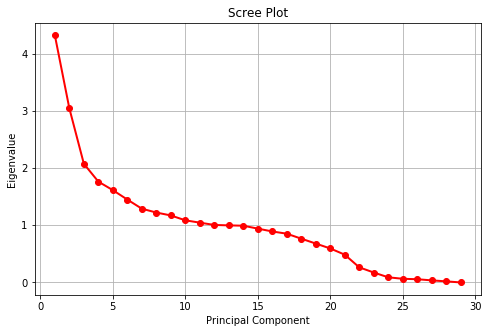

In [45]:
## (9) scree plot
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(); plt.show()


In [46]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.49034395e-01, 1.04981849e-01, 7.15781169e-02, 6.08064423e-02,
       5.56743226e-02, 4.99825390e-02, 4.44849749e-02, 4.21581936e-02,
       4.04135599e-02, 3.74763069e-02, 3.60640002e-02, 3.46770137e-02,
       3.44190839e-02, 3.42175617e-02, 3.24728432e-02, 3.07506409e-02,
       2.94051960e-02, 2.64037056e-02, 2.34592347e-02, 2.05005714e-02,
       1.67563964e-02, 9.12373215e-03, 5.99283852e-03, 3.10531013e-03,
       2.20823156e-03, 1.94407875e-03, 1.24940885e-03, 6.59452307e-04,
       2.93918520e-32])

<h3>Save all PCA and LDA Results to excel file<h3>

In [47]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Loadings_dataset7.xlsx', engine='xlsxwriter')

pca_eigenVal_var.to_excel(writer, sheet_name='pca_eigenVal_var')
Loadings.to_excel(writer, sheet_name='Loadings')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [48]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_EigenVectors_dataset7.xlsx', engine='xlsxwriter')

EigenVectors.to_excel(writer, sheet_name='EigenVectors')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [49]:
#*******************************************************************************
#                         Save data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/PCA_Data_dataset7.xlsx', engine='xlsxwriter')

X_train_PCA.to_excel(writer, sheet_name='PCA Data', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()